## Observations and Insights

* Capomulin and Ramicane showed the most promise in treating the mice population and the resulting tumor size that was 41.56 and 40.56 respectively reflects their success.

* Other drug regiments were more effective than placebo hence some treatments had an impact but Capomulin and Remicane had the best impact.

* Ketapril treatment performed worse than placebo which could indicate that the treatment increased the tumor on the selected mice.


## Dependencies and starter code

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation,\ 
# and SEM of the tumor volume for each regimen

mean_dr = pd.DataFrame(round(all_data.groupby(['Drug Regimen']).mean()[{"Tumor Volume (mm3)":'Mean'}],2))
median_dr = pd.DataFrame(round(all_data.groupby(['Drug Regimen']).median()[{"Tumor Volume (mm3)":'Median'}],2))
variance_dr = pd.DataFrame(round(all_data.groupby(['Drug Regimen']).var()[{"Tumor Volume (mm3)":'Variance'}],2))
std_dr = pd.DataFrame(round(all_data.groupby(['Drug Regimen']).std()[{"Tumor Volume (mm3)":'Standard Deviations'}],2))
sem_dr = pd.DataFrame(round(all_data.groupby(['Drug Regimen']).sem()[{"Tumor Volume (mm3)":'SEM'}],2))

#Create dataframe and format
dr_sum = pd.DataFrame({          'Mean': median_dr["Tumor Volume (mm3)"], 
                                 'Median':variance_dr["Tumor Volume (mm3)"], 
                                 'Variance':std_dr["Tumor Volume (mm3)"], 
                                 'Std Deviation':std_dr["Tumor Volume (mm3)"],
                                 'SEM':sem_dr["Tumor Volume (mm3)"]
                       })

dr_sum.style.set_caption("Summary Statistics")

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,41.56,24.95,4.99,4.99,0.33
Ceftamin,51.78,39.29,6.27,6.27,0.47
Infubinol,51.82,43.13,6.57,6.57,0.49
Ketapril,53.7,68.55,8.28,8.28,0.6
Naftisol,52.51,66.17,8.13,8.13,0.6
Placebo,52.29,61.17,7.82,7.82,0.58
Propriva,50.85,42.35,6.51,6.51,0.51
Ramicane,40.67,23.49,4.85,4.85,0.32
Stelasyn,52.43,59.45,7.71,7.71,0.57


## Bar plots

Text(0, 0.5, 'Tumor Volume (mm3)')

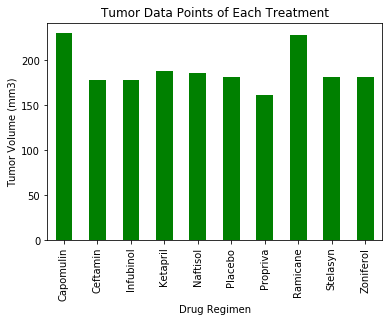

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
cnt_dr = all_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].count()
pandas_graph = cnt_dr.plot(kind="bar", facecolor="green")

plt.title('Tumor Data Points of Each Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

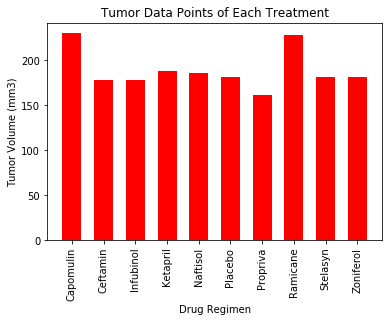

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Create X and Y variables from DataFrame
pyplot_graph=pd.DataFrame(all_data.groupby(['Drug Regimen'])[["Tumor Volume (mm3)"]].count().reset_index())
x=pyplot_graph['Drug Regimen'].tolist()
y=pyplot_graph["Tumor Volume (mm3)"].tolist()

#Create Bar Graph and bar sizes
width = [.6]
plt.bar(x,y,color = 'red',width=width)

# Add title and axis names
plt.title('Tumor Data Points of Each Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
 
# Rotate X axis
plt.xticks(rotation=90)

# Show graphic
plt.show()

## Pie plots

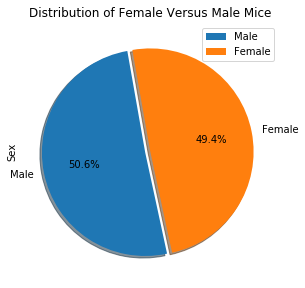

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_pd_graph=pd.DataFrame(all_data.groupby(['Sex'])['Sex'].count(),index=['Male','Female'])
title="Distribution of Female Versus Male Mice"

plot = pie_pd_graph.plot.pie(y='Sex',autopct="%1.1f%%",title=title,figsize=(4.75,4.75),explode=(.05,0),
        shadow=True, startangle=100)


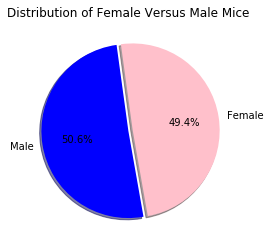

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_pd_graph=pd.DataFrame(all_data.groupby(['Sex'])[["Mouse ID"]].count().reset_index())
labels=pie_pd_graph['Sex'].tolist()
sizes=pie_pd_graph["Mouse ID"].tolist()

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.05, 0)  # Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=-80)  
plt.title("Distribution of Female Versus Male Mice")
plt.show()

## Quartiles, outliers and boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

#4 promising treatment filtered
drug=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
drug_filter=all_data['Drug Regimen'].isin(drug)
drug_chosen = all_data[drug_filter]

#Last day of treatment filtered
h_tie=drug_chosen['Timepoint']==45
drug_45 = drug_chosen[h_tie]

#New dataframe for 4 promissing treatments on the last timepoint (45) and Tumor Volume
drug_45 = pd.DataFrame({          'Mouse ID': drug_45["Mouse ID"], 
                                  'Drug Regimen':drug_45["Drug Regimen"], 
                                  'Timepoint':drug_45["Timepoint"],
                                  "Tumor Volume (mm3)":drug_45["Tumor Volume (mm3)"] 
                       })

drug_45 #4 Treatments at 45 Days

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
...,...,...,...,...
1797,x822,Ceftamin,45,61.386660
1813,y163,Infubinol,45,67.685569
1845,y769,Ceftamin,45,68.594745
1855,y865,Ceftamin,45,64.729837


In [12]:
#Calculate the IQR
# Interquartile range (IQR) 
t_volume=drug_45["Tumor Volume (mm3)"]
IQR = st.iqr(t_volume, interpolation = 'midpoint') 
  
print(IQR) 

28.66218635


In [13]:
#Quantitatively determine if there are any potential outliers. 4 SMALL
drug_45.nsmallest(4,"Tumor Volume (mm3)").style.set_caption("Potentail Outliers Small Tumor Volume")


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.0501
19,s185,Capomulin,45,23.3436
39,m601,Capomulin,45,28.431
29,x401,Capomulin,45,28.484


In [14]:
#Quantitatively determine if there are any potential outliers. 4 LARGE
drug_45.nlargest(4,"Tumor Volume (mm3)").style.set_caption("Potentail Outliers Large Tumor Volume")


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
637,c139,Infubinol,45,72.2267
1033,k210,Ceftamin,45,68.9232
1845,y769,Ceftamin,45,68.5947
463,a203,Infubinol,45,67.9734


Text(0, 0.5, 'Tumor Volume (mm3)')

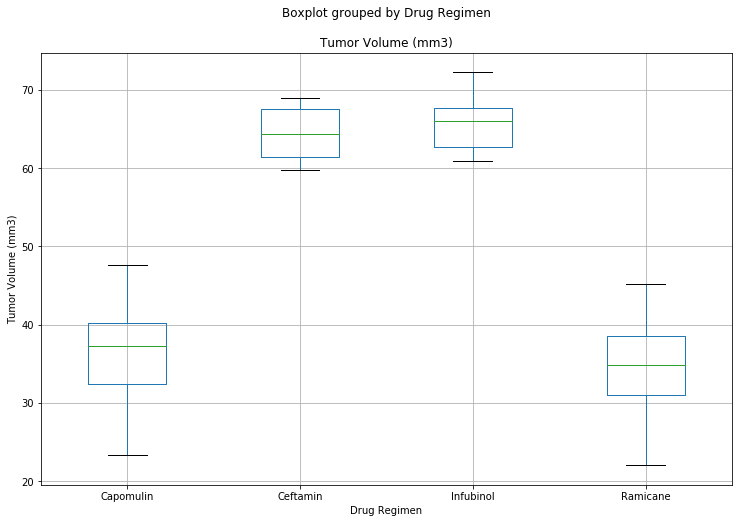

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_45.boxplot(by='Drug Regimen', 
                       column=["Tumor Volume (mm3)"], figsize=(12,8),
                       grid=True)
plt.ylabel("Tumor Volume (mm3)")

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

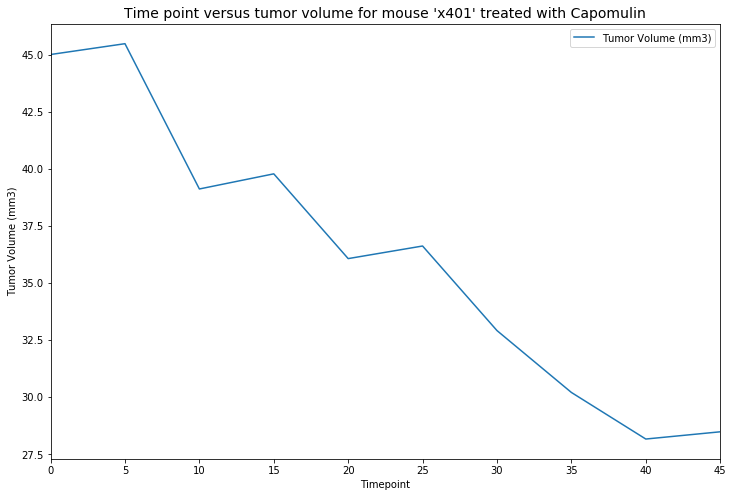

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#4 promising treatment filtered
a_plot=all_data['Drug Regimen']=="Capomulin"
a_choice = all_data[a_plot]

b_plot=a_choice["Mouse ID"]=='x401'
b_choice = a_choice[b_plot]


ax=b_choice.plot(x="Timepoint", y=["Tumor Volume (mm3)"],figsize=(12,8))
ax.set_title("Time point versus tumor volume for mouse 'x401' treated with Capomulin", fontsize=14)
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

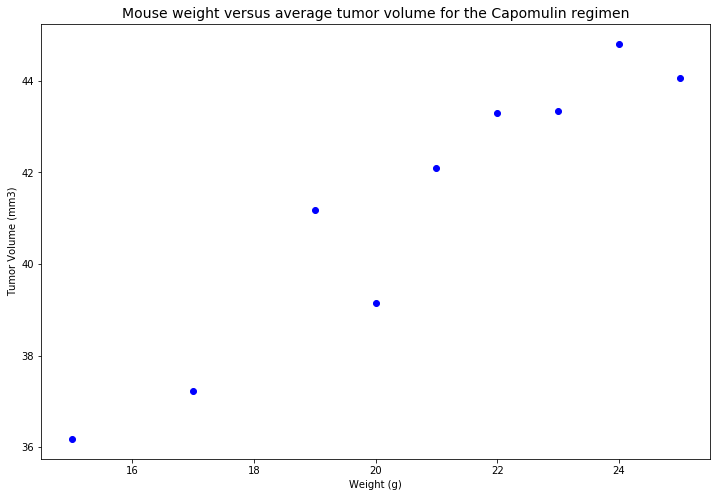

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plot_avg=a_choice.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.scatter(x=plot_avg["Weight (g)"], y=plot_avg["Tumor Volume (mm3)"],color='blue', marker='o')
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen",fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

,Weight (g),Tumor Volume (mm3)
Weight (g),1,0.950524
Tumor Volume (mm3),0.950524,1


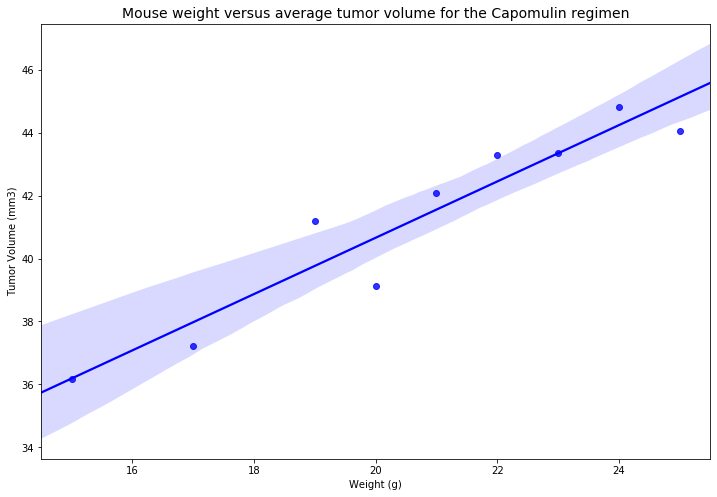

In [19]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

c_choice = pd.DataFrame(a_choice.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index())
d_choice=c_choice.corr()

plt.figure(figsize=(12,8)) 
sns.regplot(x=plot_avg["Weight (g)"],y=plot_avg["Tumor Volume (mm3)"],color='blue', marker='o')
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen",fontsize=14)

d_choice.style.set_caption("Correlation Coefficient")
